<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/Desaf%C3%ADo_KNN_PIPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import OrdinalEncoder

In [3]:
col_names=["Sex", "Length", "Diameter_continuous","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]
df = pd.read_csv("/content/drive/MyDrive/Coding Dojo /Codigo /week5/abalone.data", names=col_names)
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4177 non-null   object 
 1   Length               4177 non-null   float64
 2   Diameter_continuous  4177 non-null   float64
 3   Height               4177 non-null   float64
 4   Whole_weight         4177 non-null   float64
 5   Shucked_weight       4177 non-null   float64
 6   Viscera_weight       4177 non-null   float64
 7   Shell_weight         4177 non-null   float64
 8   Rings                4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df = pd.DataFrame(df)
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.isnull().sum()

Sex                    0
Length                 0
Diameter_continuous    0
Height                 0
Whole_weight           0
Shucked_weight         0
Viscera_weight         0
Shell_weight           0
Rings                  0
dtype: int64

In [7]:
df.shape

(4177, 9)

   Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope
   Rings		integer			+1.5 gives the age in years

In [8]:
df['age'] = df['Rings']+1.5
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [9]:
df_SEX = pd.get_dummies(df)
df_SEX

,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,1,0,0


In [10]:
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [11]:
df_sin_SEX = df.drop("Sex", axis = 1)
df_sin_SEX

,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


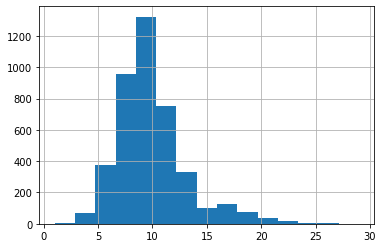

In [12]:
df_sin_SEX["Rings"].hist(bins=15)
plt.show() 

In [13]:
correlation_matrix = df_sin_SEX.corr()
correlation_matrix_rings = correlation_matrix["Rings"]
print(correlation_matrix_rings) 

Length                 0.556720
Diameter_continuous    0.574660
Height                 0.557467
Whole_weight           0.540390
Shucked_weight         0.420884
Viscera_weight         0.503819
Shell_weight           0.627574
Rings                  1.000000
age                    1.000000
Name: Rings, dtype: float64


In [14]:
X = df_sin_SEX.drop("Rings", axis=1)
X

,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [15]:
df_age_in = df_sin_SEX.loc[:,'age']
df_age_in

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

In [16]:
X = X.values
#X
y = df_sin_SEX["Rings"]
y = y.values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
knn_model = KNeighborsRegressor(n_neighbors = 3) 

In [19]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [20]:
preds = knn_model.predict(X_train)


In [21]:
score = knn_model.score(X_train, y_train)
print(score)

0.9998938249551946


In [22]:
print(preds)


[ 9. 10. 10. ...  8.  8.  9.]


In [23]:
rings_pre = pd.DataFrame(preds)
rings_pre

,0
0,9.0
1,10.0
2,10.0
3,8.0
4,5.0
...,...
3336,17.0
3337,6.0
3338,8.0
3339,8.0


In [24]:
rings_pre['age_P'] = rings_pre[0]+1.5
rings_pre

,0,age_P
0,9.0,10.5
1,10.0,11.5
2,10.0,11.5
3,8.0,9.5
4,5.0,6.5
...,...,...
3336,17.0,18.5
3337,6.0,7.5
3338,8.0,9.5
3339,8.0,9.5


In [25]:
rings_pre['age_I'] = df_age_in
rings_pre.head(20)

,0,age_P,age_I
0,9.0,10.5,16.5
1,10.0,11.5,8.5
2,10.0,11.5,10.5
3,8.0,9.5,11.5
4,5.0,6.5,8.5
5,10.0,11.5,9.5
6,6.0,7.5,21.5
7,7.0,8.5,17.5
8,10.0,11.5,10.5
9,13.0,14.5,20.5


In [26]:
Age_prediction = rings_pre.rename(columns={0:'Rings_Predi'})
Age_prediction

,Rings_Predi,age_P,age_I
0,9.0,10.5,16.5
1,10.0,11.5,8.5
2,10.0,11.5,10.5
3,8.0,9.5,11.5
4,5.0,6.5,8.5
...,...,...,...
3336,17.0,18.5,12.5
3337,6.0,7.5,16.5
3338,8.0,9.5,17.5
3339,8.0,9.5,13.5


In [27]:
Age_prediction.head(20)

,Rings_Predi,age_P,age_I
0,9.0,10.5,16.5
1,10.0,11.5,8.5
2,10.0,11.5,10.5
3,8.0,9.5,11.5
4,5.0,6.5,8.5
5,10.0,11.5,9.5
6,6.0,7.5,21.5
7,7.0,8.5,17.5
8,10.0,11.5,10.5
9,13.0,14.5,20.5


Utilizar el conjunto de datos de abulón para predecir el sexo a partir de sus características

In [28]:
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [29]:
df_T = df
df_T

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [30]:
df_T['Sex_T'] = 0.0
df_T

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age,Sex_T
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,0.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,0.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,0.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,0.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,0.0


In [31]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4177 non-null   object 
 1   Length               4177 non-null   float64
 2   Diameter_continuous  4177 non-null   float64
 3   Height               4177 non-null   float64
 4   Whole_weight         4177 non-null   float64
 5   Shucked_weight       4177 non-null   float64
 6   Viscera_weight       4177 non-null   float64
 7   Shell_weight         4177 non-null   float64
 8   Rings                4177 non-null   int64  
 9   age                  4177 non-null   float64
 10  Sex_T                4177 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 359.1+ KB


In [32]:
encoder = OrdinalEncoder(categories=[["M","F","I"]])

In [33]:
encoder.fit(df_T[["Sex"]])
df_T["Sex-encoded"] = encoder.transform(df[["Sex"]])
df_T[["Sex", "Sex-encoded"]].head(10)

,Sex,Sex-encoded
0,M,0.0
1,M,0.0
2,F,1.0
3,M,0.0
4,I,2.0
5,I,2.0
6,F,1.0
7,F,1.0
8,M,0.0
9,F,1.0


In [34]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4177 non-null   object 
 1   Length               4177 non-null   float64
 2   Diameter_continuous  4177 non-null   float64
 3   Height               4177 non-null   float64
 4   Whole_weight         4177 non-null   float64
 5   Shucked_weight       4177 non-null   float64
 6   Viscera_weight       4177 non-null   float64
 7   Shell_weight         4177 non-null   float64
 8   Rings                4177 non-null   int64  
 9   age                  4177 non-null   float64
 10  Sex_T                4177 non-null   float64
 11  Sex-encoded          4177 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 391.7+ KB


In [35]:
df_T.corr()['Sex-encoded'].sort_values()

Whole_weight          -0.461238
Diameter_continuous   -0.458245
Viscera_weight        -0.454658
Length                -0.448765
Shell_weight          -0.445549
Shucked_weight        -0.440927
Height                -0.417928
Rings                 -0.351822
age                   -0.351822
Sex-encoded            1.000000
Sex_T                       NaN
Name: Sex-encoded, dtype: float64

In [36]:
df_sex_in_EC= df_T.loc[:,'Sex-encoded']
df_sex_in_EC

0       0.0
1       0.0
2       1.0
3       0.0
4       2.0
       ... 
4172    1.0
4173    0.0
4174    0.0
4175    1.0
4176    0.0
Name: Sex-encoded, Length: 4177, dtype: float64

In [37]:
df_sex_in= df_T.loc[:,'Sex']
df_sex_in

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [38]:
X_S = df_T.loc[:, ['Length',
               'Diameter_continuous'
               ,'Height'
               ,'Whole_weight'
               ,'Shucked_weight'
               ,'Viscera_weight'
               ,'Shell_weight'
               ,'Rings'
               ,'age']]

In [39]:
y_S= df_T.loc[:, 'Sex-encoded'].values
y_S.shape

(4177,)

In [40]:
scaler = StandardScaler()
scaler.fit(X_S)
X_S = scaler.transform(X_S);

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=3)

In [43]:
knn.fit(X_S,y_S)

KNeighborsClassifier(n_neighbors=3)

In [44]:
predictions = knn.predict(X_S)

In [45]:
predictions

array([0., 2., 1., ..., 0., 1., 0.])

In [46]:
Sex_pre = pd.DataFrame(predictions)
Sex_pre
Sex_pre['Sex_I'] = df_sex_in_EC
Sex_pre['Sex_I_CODIFI'] = df_sex_in
Sex_pre

,0,Sex_I,Sex_I_CODIFI
0,0.0,0.0,M
1,2.0,0.0,M
2,1.0,1.0,F
3,0.0,0.0,M
4,2.0,2.0,I
...,...,...,...
4172,0.0,1.0,F
4173,0.0,0.0,M
4174,0.0,0.0,M
4175,1.0,1.0,F


In [47]:
SEX_prediction = Sex_pre.rename(columns={0:'Sex_Pre'})
SEX_prediction.head(20)

,Sex_Pre,Sex_I,Sex_I_CODIFI
0,0.0,0.0,M
1,2.0,0.0,M
2,1.0,1.0,F
3,0.0,0.0,M
4,2.0,2.0,I
5,2.0,2.0,I
6,1.0,1.0,F
7,1.0,1.0,F
8,0.0,0.0,M
9,1.0,1.0,F


In [48]:
score = knn.score(X_S,y_S)
score

0.7392865693081159

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [66]:
pipe = make_pipeline(StandardScaler(), PCA(n_components = 8),  KNeighborsClassifier())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=8)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [67]:
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.8871595330739299
Testing accuracy: 0.8026315789473685


Incorporando tuberia tengo mayor pression en mis resultados


In [69]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=8)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [70]:
pipe.score(X_test,y_test)

0.8026315789473685

¿Para qué otros modelos o tareas sería útil usar una tubería?
para combinarlo con modelos de  de clasificación o regresión